# Linear Regression Machine Learining Homework

Disclaimer: Before proceeding with reading this, prepare to watch a person that has no idea of what he's doing struggle to improve a LinearRegression model. For those who have ML experience there might be some cringe-worthy stuff inside this notebok. For those who are new to ML this notebook can serve as an example of what not to do (*because I did it and it did not work*), but there still might be something useful inside.

Libraries needed:

In [1]:
import sys
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pyplot
import seaborn
import warnings
warnings.filterwarnings('ignore')

Load csv files into memory:

In [2]:
train = pd.read_csv('data/house-prices/train.csv',
                    index_col=['Id'])
test = pd.read_csv('data/house-prices/test.csv',
                   index_col=['Id'])

Show rows/columns for each set

In [3]:
print('train:', train.shape)
print('test', test.shape)

train: (1460, 80)
test (1459, 79)


See which is the missing column:

In [4]:
print('missing column:',
      set(train.columns) - set(test.columns))

missing column: {'SalePrice'}


We need the SalePrice to train the model, so we free up memory from the test.csv file

In [5]:
del test

Check what columns we got in the train set.

In [6]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Split the train.csv into train and test sets, in order to be able to evaluate if our model is overfitting.

In [7]:
from sklearn.model_selection import train_test_split

train_without_sale_price = train.drop(labels=['SalePrice'],
                                      axis=1)
train_only_sale_price = train['SalePrice']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train_without_sale_price,
                                                   train_only_sale_price,
                                                   test_size=0.3,
                                                   random_state=4330)

Check what are the proportions of the newly created dataframes.
We have:
x_train: containing all the columns(features) of the houses.
y_train: containing the prices of the houses.
Same goes for *_test dataframes

In [9]:
for dataframe in [x_train, x_test, y_train, y_test]:
    print(dataframe.shape)

(1022, 79)
(438, 79)
(1022,)
(438,)


Filter out only the numerical columns.
pandas.DataFrame.describe() by default gives us only the columns containing numeric values.

In [10]:
numerical_cols = x_train.describe().columns

In [11]:
print(numerical_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


Check if we have any NULL values in the numerical columns of the x_train dataframe.

In [12]:
x_train[numerical_cols].isnull().sum().sort_values()

MSSubClass         0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
FullBath           0
GarageArea         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
WoodDeckSF         0
MoSold             0
BsmtHalfBath       0
GrLivArea          0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFullBath       0
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFinSF2         0
YrSold             0
MasVnrArea         4
GarageYrBlt       49
LotFrontage      171
dtype: int64

In [13]:
x_train[numerical_cols] = x_train[numerical_cols].fillna(0)

Crete a LinearRegression and train it only on the numerical columns of the x_train dataframe.

In [14]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression();
regressor.fit(x_train[numerical_cols], y_train);

Now lets see what kind of score is this getting on the train set: 

In [15]:
regressor.score(x_train[numerical_cols], y_train)

0.7981263665303394

We can see what the model predicts:

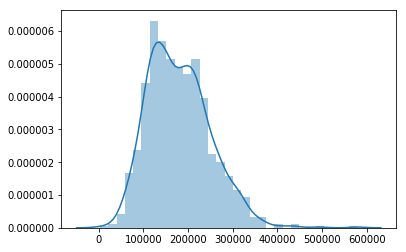

In [16]:
predictions = regressor.predict(x_train[numerical_cols])

seaborn.distplot(predictions);

We can see the error: Meaning the difference between prediction and actual sale prices (y_train)

In [17]:
differences = (predictions - y_train)
print(differences)

Id
128       7546.590216
878     -30451.567350
880       3770.639094
163       4453.017684
1181    -13686.764604
853        261.630644
77      -49072.672029
603      34333.971377
728      25289.470482
426      29997.999745
778       2962.065075
199      23947.519801
821       9283.066490
544      22689.882831
93      -26297.059576
1249     39684.060427
339      30914.773486
1060    -32056.618778
1329    -13947.868370
730     -24693.250067
955      10728.912464
453       1079.443865
1334     -5338.588757
1160      5882.554339
295      33754.407845
400     -14707.855857
1456      7839.652849
951      16676.936396
1233    -13939.449653
403      -8611.399632
            ...      
1152      3055.431185
1331     37589.799515
42      -31681.758286
1248      7209.322717
539     -15977.403743
1288     -7477.296095
282      -1537.598157
1035    -17079.785710
818      17775.160799
1006    -19593.744575
770    -129047.606800
437      22402.886120
805      -8884.209904
910       9413.217970
668    

We can see how the model does against the test set

In [18]:
x_test[numerical_cols] = x_test[numerical_cols].fillna(0)
print('score for test:', regressor.score(x_test[numerical_cols],
                                        y_test))

score for test: 0.8412021213022928


How to check the error:

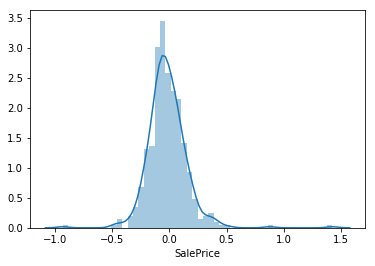

In [19]:
test_predictions = regressor.predict(x_test[numerical_cols])
error = 1 - test_predictions / y_test

seaborn.distplot(error);

Plot the regressor coefficients for each numerical column.

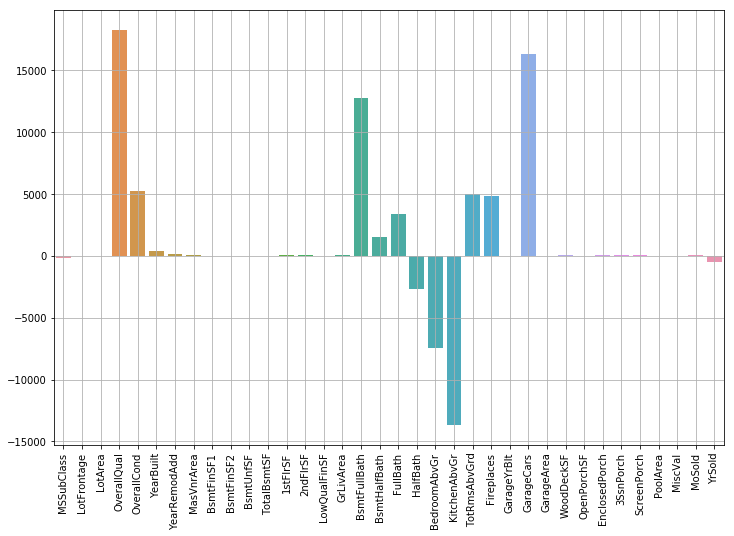

In [20]:
matplotlib.pyplot.figure(figsize=(12,8))
barplot = seaborn.barplot(x=numerical_cols,
                          y=regressor.coef_,
                         orient='vertical')

matplotlib.pyplot.setp(barplot.get_xticklabels(), rotation=90)
matplotlib.pyplot.grid(True)

By looking at the plot I would like to see why some columns have such negative coefs (i.e KitchenAbvGrd, BedroomAbvGrd),
why some columns have such high coefs (i.e. OverallQual, GarageCars, BsmtFullBath) and 
why some have almost close to 0 coefs (i.e. GrLivArea, GarageArea, LotArea)

Let's search these columns to find out more about what they mean.

In [21]:
!grep Kitchen 'data/house-prices/data_description.txt' --context=5


HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair



What Does Above Grade Mean?

In real estate, above grade means the portion of a home that is above the ground. The term is usually used to describe a room or square footage. For example, 3 bedrooms above grade means 3 bedrooms that are not in a basement.

Okay, so our model has learned that if we have kitchen that is not in the basement we should sell the house for 12,000 less, if we have 2 kitchens 24k less.
This does not make sense at all.

Same goes for Bedrooms. :(

##### Let's see some examples for the ones that are raising the price very much.

In [22]:
!grep OverallQual 'data/house-prices/data_description.txt' --after-context=15

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent


This makes sense to increase the price of a house if its above average and decrease it if it's below. Or atleast not increase it.

At the moment our model has learned that Very poor overall quality increases the price with 15k and average quality house actually increases the house price with more that 75k which is totally not acceptable.

Something that comes to my mind right away (Not sure if it will work, but let's test).
Is to actually Set the Average to 0. Which means subracting 5 from this column.

In [23]:
x_train['OverallQual'] -= 5

In [24]:
x_test['OverallQual'] -= 5

In [25]:
x_train['OverallQual'].describe()

count    1022.000000
mean        1.073386
std         1.373991
min        -3.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: OverallQual, dtype: float64

In [26]:
regressor.fit(x_train[numerical_cols],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print('Train score:',regressor.score(x_train[numerical_cols],y_train))
print('Test score:',regressor.score(x_test[numerical_cols],y_test))

Train score: 0.7981263665303391
Test score: 0.8412021213022907


So as we see this did nothing. Let's see how the coef is looking for OverallQual.

This is probably because it's not really a numerical but more of a categorical feature.

In [28]:
print(regressor.coef_[x_train[numerical_cols].columns.get_loc('OverallQual')])

18247.717407530832


Let's get it back to how it was.

In [29]:
x_train['OverallQual'] += 5
x_test['OverallQual'] += 5

x_train['OverallQual'].describe()

count    1022.000000
mean        6.073386
std         1.373991
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [30]:
regressor.fit(x_train[numerical_cols],y_train);
print('Train score:', regressor.score(x_train[numerical_cols],y_train))
print('Test score:', regressor.score(x_test[numerical_cols],y_test))

print('OverallQual coef:', regressor.coef_[x_train[numerical_cols].columns.get_loc('OverallQual')])

Train score: 0.7981263665303394
Test score: 0.8412021213022928
OverallQual coef: 18247.71740753111


We can see that just changing the value with subracting and adding won't do much.
So let's try something else.

Let's see what are the relationships between some numerical features and SalePrice: 

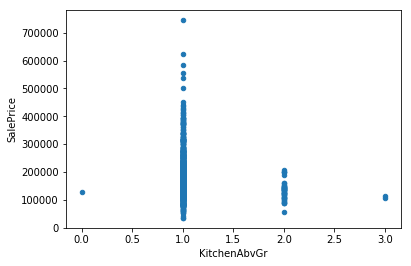

In [31]:
#KitchenAbvGr
numeric_relation = pd.concat([y_train, x_train['KitchenAbvGr']], axis=1)
numeric_relation.plot.scatter(x='KitchenAbvGr', y='SalePrice')

Okay, so this gave us nothing! Move on with let's say GrLivArea

In [32]:
!grep GrLivArea 'data/house-prices/data_description.txt' --after-context=1 

GrLivArea: Above grade (ground) living area square feet



In [33]:
#Define function to make plot of different numeric realtions.
def plot_sale_price_relation_to(numeric_feature):
    numeric_relation = pd.concat([y_train, x_train[numeric_feature]], axis=1)
    numeric_relation.plot.scatter(x=numeric_feature, y='SalePrice')

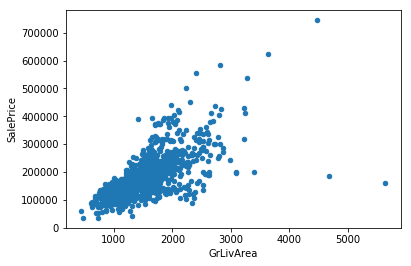

In [34]:
plot_sale_price_relation_to('GrLivArea')

Okay, now we can see from this plot that the biger the living space above ground is the higher the price.
From the coefficient plot earlier we saw that GrLivArea is almost not important for the determination of the price. Maybe this needs to be changed somehow.

Let's try to get a better undersanding of correlation between diffrenet features and SalePrice.

This we can do with a Correlation matrix.

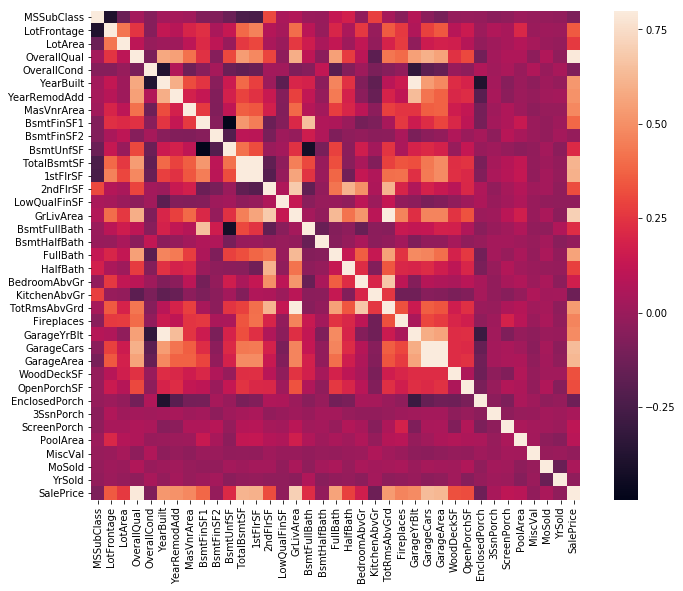

In [35]:
import matplotlib.pyplot as plt

correlation_matrix = train.corr()
f, ax = plt.subplots(figsize=(12,9))
seaborn.heatmap(correlation_matrix, vmax=0.8, square=True);

In the heatmap above we can see 2 big white squares:
First one being the relation between TotalBsmtSF and 1stFlrSF
Second one being the relation between GarageCars and GarageArea.
Meaning that both of these variables give the same information.

Also GarageYrBlt and YearBuild are strongly correlated, probably because in 99% of cases you build a house with a garage simulatneously.

Looking at SalePrice correlations, we see that OveralQual and GrLivArea are strongly correlated to SalePrice. Which makes perfect sense.

There are a few more variables that we must take into account.

In [36]:
#Take the features that influence SalePrice the most
number_of_features = 10
cols = correlation_matrix.nlargest(number_of_features,'SalePrice')['SalePrice'].index
print(cols)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


In [37]:
#Get the correlation coefs.

import numpy as np

coefs = np.corrcoef(train[cols].values.T)

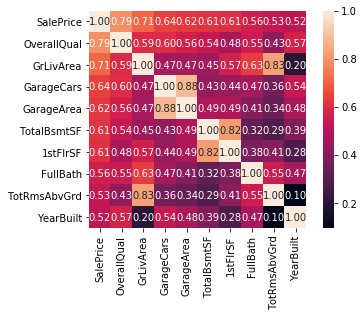

In [38]:
heatmap = seaborn.heatmap(
    coefs,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size':10},
    yticklabels = cols.values,
    xticklabels = cols.values
    )
plt.show()

These are the top 10 features that are most correlated with SalePrice.

This shows us that:
TotRmsAbvGrd and GrLivArea are very correlated. This makes sense, doesn't it.

GarageArea and GarageCars same as above.

TotalBsmtSF and 1stFlrSF too are very strongly correlated.

We can get rid of the one of the two that are correlated since they give us the same information anyway.

Something else we can get rid of is columns that are missing data.

In [39]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys =['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


We see that we've got a lot of columns that are missing a lot of data.

We will exclude all the columns that have over 15% of the data missing.

Another thing that we can notice that same amount of data is missing for all GarageColumns, this means that probably there is no garages for those houses or that it wasn't filled.
Anyway we found out that the most important Garage related information comes from GarageCars, so we can remove those as well.

For Bsmt* columns that are missing data, we can assume the same as for Garage* columns and since our most importand Bsmt related column is TotalBsmtSF we can get rid of those columns.

We can abstract ourselves from the MasVnrType and MasVnrArea, becausewe can see somewhat strong correlation between the above and 'YearBuilt' and 'OverallQual' which we are already taking into consideration.

For Electrical, since we have only 1 row with missing data, we will delete it.


In [40]:
#removing columns that we do not want.

train_without_missing_data = train.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)

#drop row that has NULL in Electrical column
train_without_missing_data = train_without_missing_data.drop(train_without_missing_data.loc[train['Electrical'].isnull()].index)

#check if we have nulls

train_without_missing_data.isnull().sum().max()

0

Okay, we removed null values, let's remove the following as well:
 GarageArea,
 1stFlrSF,
 TotRmsAbvGrd
 
These we remove because they are strongly correlated to GarageCars,TotalBsmtSF, GrLivArea

In [41]:
train_without_duplicates = train_without_missing_data.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1)
train_without_duplicates.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,10517.363948,6.100069,5.575737,1971.244003,1984.850583,443.943797,46.581220,567.366004,1057.891021,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,9984.666267,1.383171,1.113079,30.199555,20.644343,456.106417,161.369977,441.992392,438.500975,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,796.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,384.000000,0.000000,479.000000,992.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,712.500000,0.000000,808.000000,1298.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's check out if our model got any better. So let's split our newly derived train dataset into test and train.

In [42]:
train_without_sale_price = train_without_duplicates.drop('SalePrice',axis=1)
train_only_sale_price = train_without_duplicates['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(train_without_sale_price,
                                                   train_only_sale_price,
                                                   test_size=0.3,
                                                   random_state=4330)

In [43]:
#Find the numeric columns once again.
numeric_columns = train_without_sale_price.describe().columns
print(numeric_columns)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [44]:
regressor.fit(x_train[numeric_columns],y_train)
print('Train score:',regressor.score(x_train[numeric_columns],y_train))
print('Test score:', regressor.score(x_test[numeric_columns], y_test))

Train score: 0.8231694383233468
Test score: 0.7589894365381519


Okay, so it seems like our model is overfitting right now.
Let's see if it will get better once we include categorical columns as well.

In [45]:
#identify categorical columns in our 'best' derived dataset
#that doesn't contain Null values and strongly correlated columns
categorical_cols = train_without_duplicates.dtypes[train_without_duplicates.dtypes =='object'].index
print(categorical_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [46]:
from sklearn.preprocessing import LabelEncoder
#Since I don't think we will need the raw dataset anymore let's raplace it.
train = train_without_duplicates
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_cols}

print(encoders['Street'].classes_)

['Grvl' 'Pave']


Okay now let's replace original values with the encoded ones.

In [47]:
def encode_categorical(data, columns, encoders):
    return pd.DataFrame(
        {col: encoders[col].transform(data[col]) for col in columns},
        index = data.index
        )

train_encoded = encode_categorical(train, categorical_cols, encoders)
train_encoded.head(8)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,...,2,1,0,1,4,2,6,2,8,4
2,3,1,3,3,0,2,0,24,1,2,...,1,1,0,1,4,3,6,2,8,4
3,3,1,0,3,0,4,0,5,2,2,...,2,1,0,1,4,2,6,2,8,4
4,3,1,0,3,0,0,0,6,2,2,...,0,1,2,1,4,2,6,2,8,0
5,3,1,0,3,0,2,0,15,2,2,...,2,1,0,1,4,2,6,2,8,4
6,3,1,0,3,0,4,0,11,2,2,...,5,1,0,1,4,3,6,2,8,4
7,3,1,3,3,0,4,0,21,2,2,...,2,1,0,1,4,2,6,2,8,4
8,3,1,0,3,0,0,0,14,4,2,...,1,1,0,1,4,3,6,2,8,4


In [48]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder().fit(train_encoded)
print(one_hot_encoder.transform(train_encoded).shape)


(1459, 187)


Now let's combine the encoded categorical data with the numerical data.

In [49]:
one_hot_train = one_hot_encoder.transform(encode_categorical(train[categorical_cols], categorical_cols, encoders))

In [50]:
# numeric_columns : contains all numeric column names without SalePrice

numeric_columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [51]:
train[numeric_columns].shape, one_hot_train.todense().shape

((1459, 30), (1459, 187))

In [52]:
new_train = pd.np.concatenate(
    [one_hot_train.todense(), train[numeric_columns]],
    axis = 1
    )

new_train.shape

(1459, 217)

Okay, now we got our new data set with our numerical values concatenated to the OneHotEncoder ones.

Let's split again into test and train sets and train a regression.

In [53]:
new_train_sale_price = train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(new_train,
                                                   new_train_sale_price,
                                                   test_size=0.3,
                                                   random_state=4330)
x_train.shape, y_train.shape

((1021, 217), (1021,))

In [54]:
new_regressor = LinearRegression().fit(x_train,pd.np.log10(y_train))
print('Train score:', new_regressor.score(x_train,pd.np.log10(y_train)))
print('Test score:', new_regressor.score(x_test,pd.np.log10(y_test)))

Train score: 0.94767508258272
Test score: -40036875.6729802


Wow, I didn't even think it is possible to get such a low test score :D

Okay, I messed up somewhere. Why did that happen? I just have no idea what I am doing, I suppose.
Maybe I messed up the order of prices with features somewhere along the way? Or I overfitted it way too much. Maybe I messed up the OneHotEncoder...

Let's just try to use Ridge and see what happens and then we will start over.

In [55]:
from sklearn.linear_model import Ridge
alpha = [0.01,0.1,1,10,100]

for a in alpha:
    all_data_lr = Ridge(alpha = a).fit(x_train, pd.np.log10(y_train))
    print('alpha:', a)
    print(all_data_lr.score(x_train, pd.np.log10(y_train)), all_data_lr.score(x_test,pd.np.log10(y_test)))
    print()

alpha: 0.01
0.9476663597262133 0.8363900538602915

alpha: 0.1
0.9470521074118586 0.8480493784428785

alpha: 1
0.9374310542277196 0.8751752310141594

alpha: 10
0.9178102161430584 0.8870065950957237

alpha: 100
0.8930778019010625 0.8793938943366159



Alright, so it seems like our trash LinearRegression model isn't that bad when we use a little bit of regularisation.

Let's try and get the optimal alpha parameter.

In [56]:
alpha = np.arange(0.01,100,0.5)
best_test_score = -1
best_alpha = 0.01
for a in alpha:
    ridge_lr = Ridge(alpha=a).fit(x_train, pd.np.log10(y_train))
    train_score = ridge_lr.score(x_train, pd.np.log10(y_train))
    test_score = ridge_lr.score(x_test, pd.np.log10(y_test))
    if test_score > best_test_score:
        best_test_score = test_score
        best_alpha = a
    else:
        break

best_ridge_lr = Ridge(alpha=best_alpha).fit(x_train, pd.np.log10(y_train))

print('Best train score:',best_ridge_lr.score(x_train, pd.np.log10(y_train)))
print('Best test score:',best_ridge_lr.score(x_test, pd.np.log10(y_test)))

Best train score: 0.9143385838920826
Best test score: 0.8872295113853714


Alright so either my alorithm for finding the optimal is wrong or this is the best it gets with all the stuff I did.

Let's try one more thing and it is instead of
OneHotEncoder-ing every category I want to see what pandas get_dummies will do.

In [57]:
#After all these transformations I think this is the dataset
#where we got all Null values removed and also removed some columns
#that I removed because I think don't carry any value
#because they have similar ones.

train.shape

(1459, 59)

In [58]:
train_with_dummies = pd.get_dummies(train)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(train_with_dummies.drop('SalePrice',axis=1),
                                                   train_with_dummies['SalePrice'],
                                                   test_size=0.3,
                                                   random_state=4330)
x_train.shape, y_train.shape

((1021, 217), (1021,))

Okay now, these shapes seem very similar to the ones of the OneHotEncoder dataset.

In [60]:
#Momenth of truth
y_train = pd.np.log10(y_train)
y_test = pd.np.log10(y_test)
lr = LinearRegression().fit(x_train,y_train)
print(lr.score(x_train,y_train), lr.score(x_test,y_test))

0.947675087367222 0.8346753252436385


Okay, so far so good. Let's Ridge it up.(Not sure if someone says this.)

In [61]:
#Define function to get best regularized model
#because we might need it the way it's gone so far

def get_best_ridge_model(x_train, y_train, x_test, y_test):
    alpha = np.arange(0.01,100,0.5)
    best_alpha = 0.01
    best_test_score = -1
    for a in alpha:
        ridge_lr = Ridge(alpha = a).fit(x_train,y_train)
        test_score = ridge_lr.score(x_test,y_test)
        if test_score > best_test_score:
            best_test_score = test_score
            best_alpha = a
        else:
            break
    return Ridge(alpha = best_alpha).fit(x_train, y_train)



best_model = get_best_ridge_model(x_train,y_train,x_test,y_test)
print('Train score:',best_model.score(x_train, y_train))
print('Test score:',best_model.score(x_test, y_test))

Train score: 0.9143385838920826
Test score: 0.8872295113853713


Alright, so our final result is the same as with the OneHotEncoder. Great stuff.

If you made it to the end. Thank you for the time. I'd love some feedback on why did I get such a negative test score in one of the linear regressions, also your opinion on me removing the NULL value features and also removing features that are strongly correlated to others.